In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset

,Weight,Age,Gender,SBP,DBP,HeartRate,MAP,Oxygen_saturation,Timestamp,Remifentanil_flow
0,67.3,30,male,118,75,102,65,86,1,1.2
1,65.0,33,female,114,80,95,74,88,1,1.2
2,70.5,50,male,115,79,98,65,68,1,2.2
3,68.6,46,female,147,92,103,75,74,1,2.2
4,74.5,35,male,112,75,110,62,80,1,1.2
...,...,...,...,...,...,...,...,...,...,...
671,50.0,32,male,144,89,94,75,90,1,1.5
672,50.0,32,female,146,89,94,75,88,2,1.3
673,50.0,32,female,145,90,93,75,87,2,1.4
674,50.0,32,male,168,87,97,75,78,2,1.4


In [3]:
dataset.isnull().sum()

Weight               0
Age                  0
Gender               0
SBP                  0
DBP                  0
HeartRate            0
MAP                  0
Oxygen_saturation    0
Timestamp            0
Remifentanil_flow    0
dtype: int64

In [4]:
dataset.describe()

,Weight,Age,SBP,DBP,HeartRate,MAP,Oxygen_saturation,Timestamp,Remifentanil_flow
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,63.280769,42.591716,129.721893,83.378698,93.720414,70.025148,77.940828,1.513314,1.682396
std,8.910868,10.240465,20.569727,6.706222,11.092217,5.097940,9.690441,0.500193,0.517631
min,45.000000,27.000000,97.000000,70.000000,68.000000,61.000000,8.000000,1.000000,1.000000
25%,55.975000,34.000000,112.000000,78.000000,86.000000,65.000000,70.000000,1.000000,1.200000
50%,60.000000,38.000000,120.000000,80.000000,94.000000,67.000000,78.000000,2.000000,1.400000
75%,70.500000,54.000000,148.000000,89.000000,103.000000,75.000000,87.000000,2.000000,2.200000
max,82.000000,59.000000,172.000000,99.000000,125.000000,78.000000,97.000000,2.000000,2.600000


In [5]:
dummy = pd.get_dummies(dataset['Gender'])
dummy.head()

,female,male
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True


In [6]:
df=pd.concat((dataset,dummy), axis = 1)
df.head()

,Weight,Age,Gender,SBP,DBP,HeartRate,MAP,Oxygen_saturation,Timestamp,Remifentanil_flow,female,male
0,67.3,30,male,118,75,102,65,86,1,1.2,False,True
1,65.0,33,female,114,80,95,74,88,1,1.2,True,False
2,70.5,50,male,115,79,98,65,68,1,2.2,False,True
3,68.6,46,female,147,92,103,75,74,1,2.2,True,False
4,74.5,35,male,112,75,110,62,80,1,1.2,False,True


In [7]:
df=df.drop(['Gender'],axis=1)
df

,Weight,Age,SBP,DBP,HeartRate,MAP,Oxygen_saturation,Timestamp,Remifentanil_flow,female,male
0,67.3,30,118,75,102,65,86,1,1.2,False,True
1,65.0,33,114,80,95,74,88,1,1.2,True,False
2,70.5,50,115,79,98,65,68,1,2.2,False,True
3,68.6,46,147,92,103,75,74,1,2.2,True,False
4,74.5,35,112,75,110,62,80,1,1.2,False,True
...,...,...,...,...,...,...,...,...,...,...,...
671,50.0,32,144,89,94,75,90,1,1.5,False,True
672,50.0,32,146,89,94,75,88,2,1.3,True,False
673,50.0,32,145,90,93,75,87,2,1.4,True,False
674,50.0,32,168,87,97,75,78,2,1.4,False,True


In [8]:
df=df.drop(['female'],axis=1)
df.head()

,Weight,Age,SBP,DBP,HeartRate,MAP,Oxygen_saturation,Timestamp,Remifentanil_flow,male
0,67.3,30,118,75,102,65,86,1,1.2,True
1,65.0,33,114,80,95,74,88,1,1.2,False
2,70.5,50,115,79,98,65,68,1,2.2,True
3,68.6,46,147,92,103,75,74,1,2.2,False
4,74.5,35,112,75,110,62,80,1,1.2,True


In [9]:
first_column=df.pop('male')

In [10]:
df.insert(0, 'male', first_column)

In [11]:
df.head()

,male,Weight,Age,SBP,DBP,HeartRate,MAP,Oxygen_saturation,Timestamp,Remifentanil_flow
0,True,67.3,30,118,75,102,65,86,1,1.2
1,False,65.0,33,114,80,95,74,88,1,1.2
2,True,70.5,50,115,79,98,65,68,1,2.2
3,False,68.6,46,147,92,103,75,74,1,2.2
4,True,74.5,35,112,75,110,62,80,1,1.2


In [12]:
df.rename(columns={'male':'Gender'})

,Gender,Weight,Age,SBP,DBP,HeartRate,MAP,Oxygen_saturation,Timestamp,Remifentanil_flow
0,True,67.3,30,118,75,102,65,86,1,1.2
1,False,65.0,33,114,80,95,74,88,1,1.2
2,True,70.5,50,115,79,98,65,68,1,2.2
3,False,68.6,46,147,92,103,75,74,1,2.2
4,True,74.5,35,112,75,110,62,80,1,1.2
...,...,...,...,...,...,...,...,...,...,...
671,True,50.0,32,144,89,94,75,90,1,1.5
672,False,50.0,32,146,89,94,75,88,2,1.3
673,False,50.0,32,145,90,93,75,87,2,1.4
674,True,50.0,32,168,87,97,75,78,2,1.4


In [13]:
X = df.iloc[:,0:9].values
print(X)

[[True 67.3 30 ... 65 86 1]
 [False 65.0 33 ... 74 88 1]
 [True 70.5 50 ... 65 68 1]
 ...
 [False 50.0 32 ... 75 87 2]
 [True 50.0 32 ... 75 78 2]
 [True 58.5 30 ... 74 67 2]]


In [14]:
y = df.iloc[:,-1].values
print(y)

[1.2 1.2 2.2 2.2 1.2 1.2 1.2 1.4 1.2 1.4 1.5 2.4 2.4 1.2 1.2 1.4 1.2 2.2
 2.  2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.  2.  2.2 2.2 2.4 2.4 2.4 2.4 2.4
 2.4 2.4 2.4 2.4 2.3 2.4 2.4 2.4 2.4 2.2 2.2 2.2 2.2 2.  2.  2.  2.  2.
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.4 2.3 2.3 2.4 2.4 2.4 2.4 2.4 2.6 2.4 2.4
 2.4 2.3 2.3 2.4 2.4 2.5 2.4 2.5 2.5 2.2 2.2 2.2 2.2 2.2 2.  2.  2.  2.
 2.  2.  2.  2.  2.  2.  2.2 2.2 2.2 2.2 2.2 2.3 2.3 2.2 2.2 2.1 2.  2.
 2.  2.1 2.2 2.  2.2 2.2 2.2 2.2 2.2 2.2 2.3 2.4 2.2 2.2 2.2 2.  1.4 1.4
 1.4 1.4 1.5 1.4 1.5 1.6 1.5 1.4 1.4 1.4 1.4 1.5 1.5 1.4 1.4 1.4 1.4 1.6
 1.5 1.5 1.5 1.5 1.4 1.4 1.4 1.2 1.2 1.2 1.3 1.1 1.1 1.1 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.3 1.1 1.2 1.2 1.2 1.2 1.2 1.2 1.8 1.9 1.  1.
 1.1 1.1 1.  1.4 1.4 1.4 1.5 1.4 1.3 1.4 1.4 1.4 1.5 1.4 1.4 1.4 1.5 1.4
 1.5 1.5 1.5 1.5 1.4 1.5 1.4 1.5 1.4 1.4 1.4 1.4 1.4 1.6 1.4 1.4 1.5 1.4
 1.3 1.3 1.3 1.4 1.4 1.4 1.5 1.5 1.5 1.5 1.4 1.5 1.4 1.4 1.4 1.4 1.5 1.4
 1.4 1.4 1.5 1.5 1.4 1.5 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(540, 9) (136, 9) (540,) (136,)


In [17]:
df.isnull().sum()

male                 0
Weight               0
Age                  0
SBP                  0
DBP                  0
HeartRate            0
MAP                  0
Oxygen_saturation    0
Timestamp            0
Remifentanil_flow    0
dtype: int64

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_train_predict = model.predict(X_train)
print(y_train_predict)

[1.06216695 1.8666583  1.17280973 1.28993528 1.48764047 1.6207471
 2.31901027 2.15042015 1.10129592 1.34166038 1.38318281 1.10376489
 2.50612453 1.22232405 1.51622263 2.45964376 2.21248627 1.54072773
 1.0746262  1.4907229  2.36862202 2.30765487 1.51257257 1.0883354
 1.50902199 2.46168091 2.10140908 1.89862705 2.44174463 2.26459136
 2.20794637 1.10915944 1.42224467 1.41496289 1.06547593 1.46516097
 1.00374743 1.30889315 1.43276338 1.23154137 1.26042229 1.08742149
 2.44249998 2.4944684  1.16195178 1.24997564 1.39097535 2.13109617
 1.32308665 2.3457262  1.92097848 1.26153261 1.22008349 1.8542211
 1.26457956 1.38574488 1.36922901 2.36872782 1.12087383 1.86499231
 1.47456563 2.18741049 1.4379478  2.45783217 2.51786201 1.10136951
 1.40487616 1.38333502 1.1479761  1.31437223 2.15904734 2.57518378
 1.45783471 2.29988093 1.21256288 1.65774633 1.41778045 1.59826258
 1.44106756 2.32267568 1.3690509  1.83636814 1.29666734 1.30059626
 1.15419303 1.58164371 1.13914595 1.12416158 1.84068794 1.5011318

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [21]:
y_true = [3, -0.5, 2, 7]
y_train_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_train_pred)

0.9486081370449679

In [22]:
print(r2_score(y_train,y_train_predict))

0.885317048184686


In [23]:
print(mean_absolute_error(y_train,y_train_predict))

0.13264671146981524


In [24]:
import numpy as np
print(np.sqrt(mean_squared_error(y_train,y_train_predict)))

0.17418857571445007


In [25]:
print(explained_variance_score(y_train, y_train_predict))

0.885317048184686


In [26]:
ytest_pred = model.predict(X_test)
print(ytest_pred)

[1.06499324 2.49729915 2.14545558 1.36154236 2.33505749 1.05681943
 2.18818816 0.79082455 1.11981097 1.36815415 1.17016428 1.09321538
 1.50144181 0.97475309 2.58147305 1.42557333 2.15580625 1.3328306
 2.38819918 1.21832521 2.25791485 1.20325932 1.37283662 1.43604297
 2.02048883 1.3702824  1.18788937 1.41775552 1.37915785 1.91884666
 1.24614901 1.74589312 1.50756165 2.07099057 1.97467179 1.27636144
 2.38596836 1.41741068 2.32883583 1.32045386 2.16512778 1.0915419
 1.21381811 1.56557693 1.44007213 1.28634907 2.22655187 2.20148614
 1.89202745 2.43796862 2.33607238 1.21544201 1.44292429 2.51845341
 1.13442621 1.01814145 2.38245077 1.76917451 1.09356508 1.95289968
 2.00493628 2.352637   1.32314671 2.26320872 2.11114855 2.16822606
 1.92006526 2.42675476 1.3456597  1.48659898 2.48769648 2.22736369
 2.22905289 2.16972609 1.07974537 1.14406539 1.28434239 1.31858304
 1.13927903 2.30981082 2.46579085 1.25119332 1.93554463 1.93930451
 2.48568071 1.41244018 2.39733729 2.35547933 1.46604189 1.196628

In [27]:
print(r2_score(y_test, ytest_pred))

0.8948783191730597


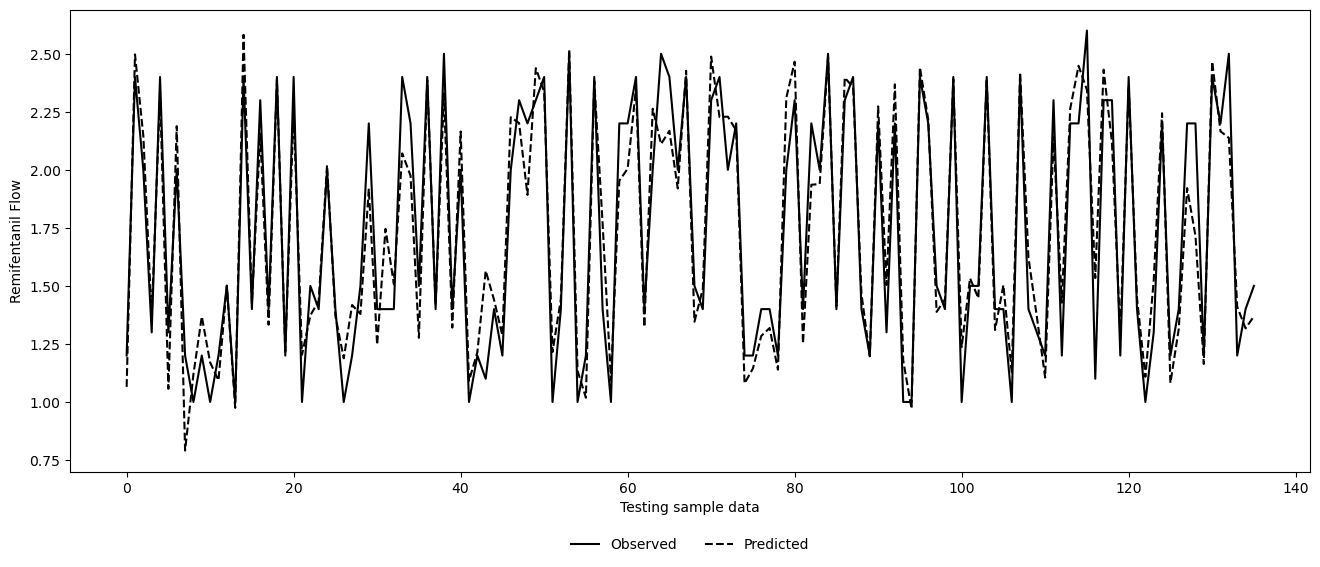

In [28]:
#plotting the observed and the predicted remifentanil flow
import matplotlib.pyplot as plt
#setting the boundaries and the parameters
plt.rcParams['figure.figsize']=(16,6)
x_ax = range(len(X_test))
#plotting
plt.plot(x_ax, y_test,label ='Observed', color ='k', linestyle ='-')
plt.plot(x_ax,ytest_pred,label = 'Predicted', color ='k', linestyle ='--')
plt.ylabel('Remifentanil Flow')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2),loc = 'lower center', ncol =2, frameon = False)
plt.show()

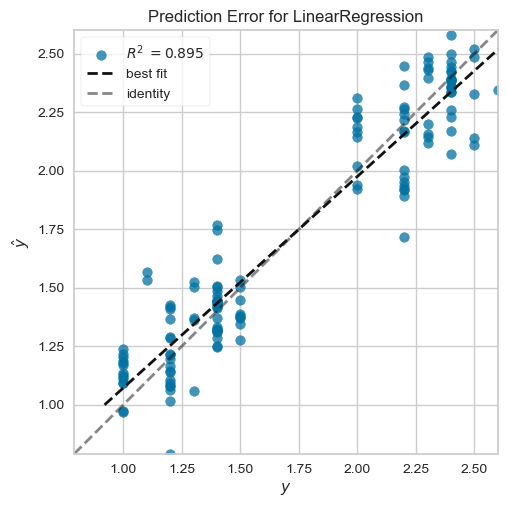

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [29]:
!pip install yellowbrick
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

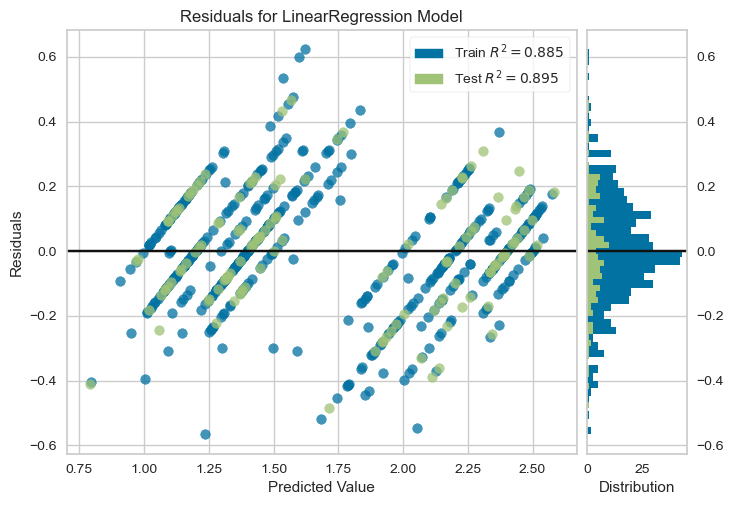

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [31]:
visualizer.predict([[0,65.0,33,114,80,95,74,88,1]])

array([1.28991654])

In [32]:
visualizer.predict([[1,74.5,35,112,75,110,62,80,1]])

array([1.18117112])

In [33]:
visualizer.predict([[0,68.6,46,147,92,103,75,74,1]])

array([1.74641441])

In [34]:
visualizer.predict([[1,80,56,134,90,68,70,67,1]])

array([2.57790103])

In [35]:
visualizer.predict([[1,100,76,154,110,88,90,87,1]])

array([3.09122189])

In [36]:
visualizer.predict([[0,80,56,134,90,68,70,67,1]])

array([2.57685349])

In [37]:
visualizer.predict([[1,80,56,134,90,68,70,67,2]])

array([2.59283352])

In [38]:
visualizer.predict([[1,80,56,134,90,68,70,67,3]])

array([2.60776601])

In [39]:
visualizer.predict([[1,80,56,134,90,68,70,67,0]])

array([2.56296853])

In [40]:
visualizer.predict([[1,60,36,114,70,48,60,67,1]])

array([2.01570109])

In [41]:
visualizer.predict([[1,80,56,134,90,68,70,67,0]])

array([2.56296853])

In [42]:
visualizer.predict([[1,80,56,134,90,68,70,67,0.5]])

array([2.57043478])

In [43]:
visualizer.predict([[1,80,56,134,90,68,70,67,1]])

array([2.57790103])

In [44]:
visualizer.predict([[1,72,34,104,78,75,75,87,1]])

array([1.6004452])

In [45]:
visualizer.predict([[1,40,16,114,81,90,66,87,1]])

array([0.70296134])

In [46]:
visualizer.predict([[1,68.6,46,147,92,103,75,74,1]])

array([1.74746194])

In [47]:
visualizer.predict([[0,50.0,32,145,90,93,75,87,2]])

array([1.31700228])

In [48]:
visualizer.predict([[1,70.0,52,165,110,113,95,107,2]])

array([1.83137068])

In [49]:
visualizer.predict([[0,70.0,52,165,110,113,95,107,2]])

array([1.83032315])

In [50]:
visualizer.predict([[0,70.0,52,165,110,113,95,107,1]])

array([1.81539065])

In [51]:
visualizer.predict([[0,70.0,52,165,110,113,95,107,3]])

array([1.84525564])

In [52]:
import pickle
filename = 'saved_model.sv'
pickle.dump(visualizer, open(filename, 'wb'))

In [53]:
#loading the saved model
loaded_model = pickle.load(open('saved_model.sv', 'rb'))

In [54]:
#Decision Tree algorithm


In [55]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [57]:
y_train_pred = model2.predict(X_train)


In [58]:
print(r2_score(y_train,y_train_pred))

1.0


In [59]:
print(mean_absolute_error(y_train,y_train_pred))

2.7961172472040977e-17


In [60]:
print(mean_squared_error(y_train, y_train_pred))

7.304267640935294e-33


In [61]:
y_test_pred = model2.predict(X_test)

In [62]:
print(r2_score(y_test, y_test_pred))

0.9509345065368654


In [63]:
model2.predict([[0,70.0,52,165,110,113,95,107,3]])

array([2.4])

In [64]:
import pickle
filename = 'model.pkl'
pickle.dump(model2, open(filename, 'wb'))


In [65]:
#loading the saved model
loaded_model = pickle.load(open('model.pkl', 'rb'))

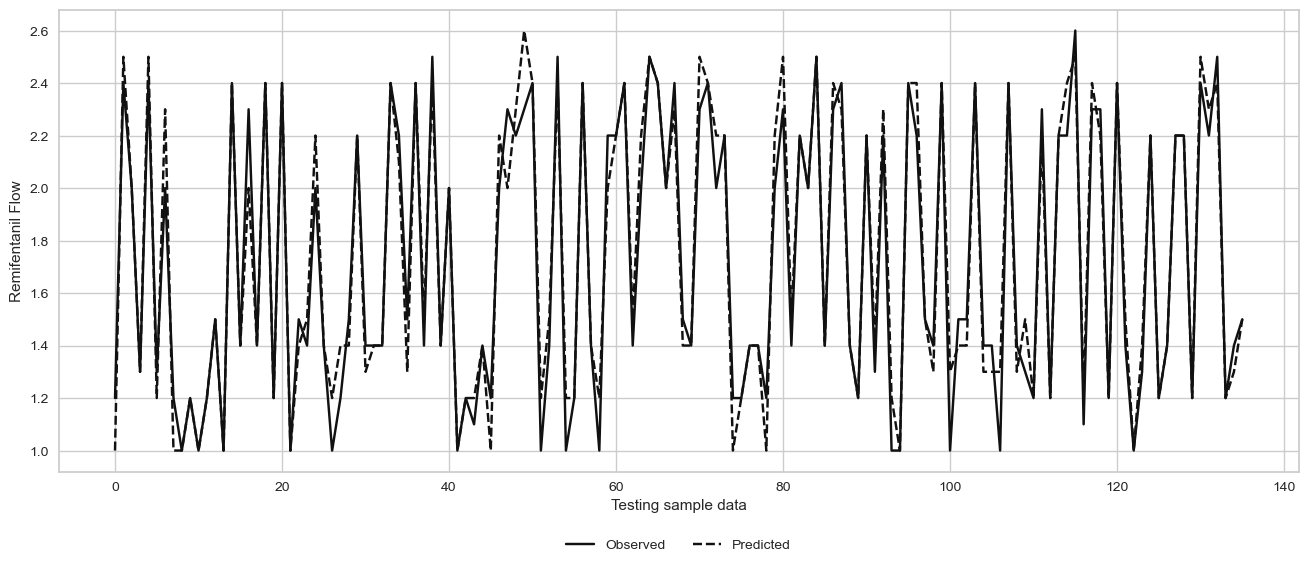

In [66]:
#plotting the observed and the predicted Remifentanil Flow
import matplotlib.pyplot as plt
#setting the boundaries and the parameters
plt.rcParams['figure.figsize']=(16,6)
x_ax = range(len(X_test))
#plotting
plt.plot(x_ax, y_test,label ='Observed', color ='k', linestyle ='-')
plt.plot(x_ax,y_test_pred,label = 'Predicted', color ='k', linestyle ='--')
plt.ylabel('Remifentanil Flow')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2),loc = 'lower center', ncol =2, frameon = False)
plt.show()

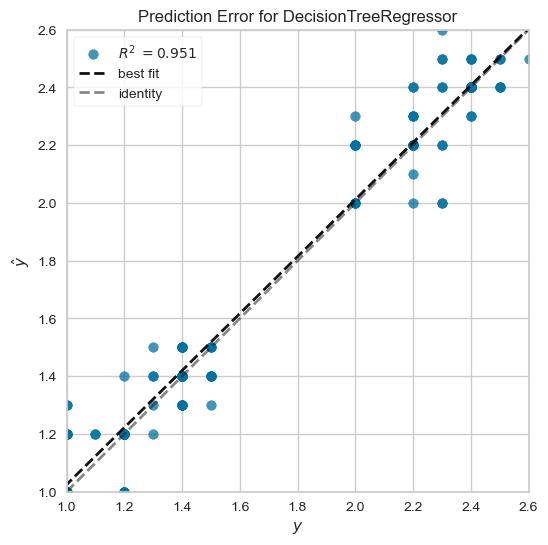

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [67]:
from yellowbrick.regressor import PredictionError
visualizer2 = PredictionError(model2)
visualizer2.fit(X_train, y_train)
visualizer2.score(X_test, y_test)
visualizer2.poof()

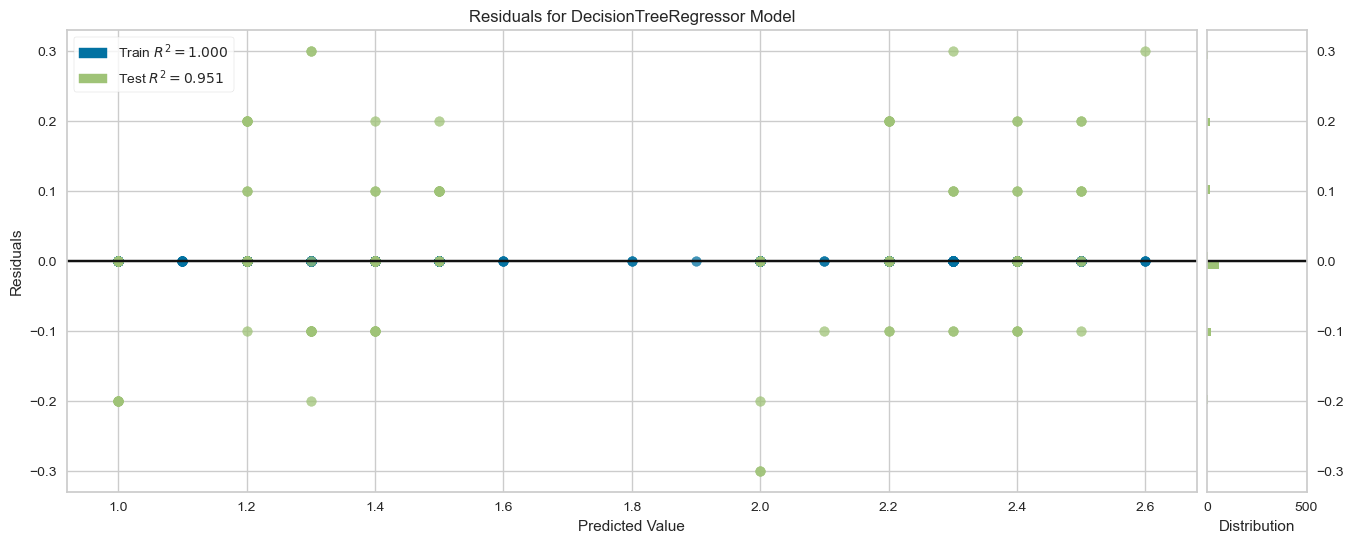

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model2)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [69]:
visualizer2.predict([[0,70.0,52,165,110,113,95,107,3]])

array([2.4])

In [70]:
visualizer.predict([[0,50.0,32,146,89,94,75,88,2]])

array([1.3])

In [71]:
visualizer2.predict([[0,50.0,32,145,90,93,75,87,2]])

array([1.3])

In [72]:
visualizer2.predict([[1,50.0,32,144,89,94,75,90,1]])

array([1.3])

In [73]:
visualizer2.predict([[1,68.6,46,147,92,103,75,74,1]])

array([2.2])

In [74]:
visualizer2.predict([[1,88.6,66,167,112,123,95,94,1]])

array([2.4])

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError, ResidualsPlot

# Assuming X_train, X_test, y_train, y_test are already defined

In [76]:
# Initialize the Gradient Boosting Regressor
model2 = GradientBoostingRegressor(random_state=42)  # You can adjust parameters as needed

# Train the model
model2.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [77]:
# Evaluation on training set
y_train_pred = model2.predict(X_train)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error (Train):", mean_squared_error(y_train, y_train_pred))

Mean Absolute Error (Train): 0.05282462859384158
Mean Squared Error (Train): 0.004358993504097176


In [78]:
# Evaluation on testing set
y_test_pred = model2.predict(X_test)
print("R-squared (Test):", r2_score(y_test, y_test_pred))

R-squared (Test): 0.9664643267525922


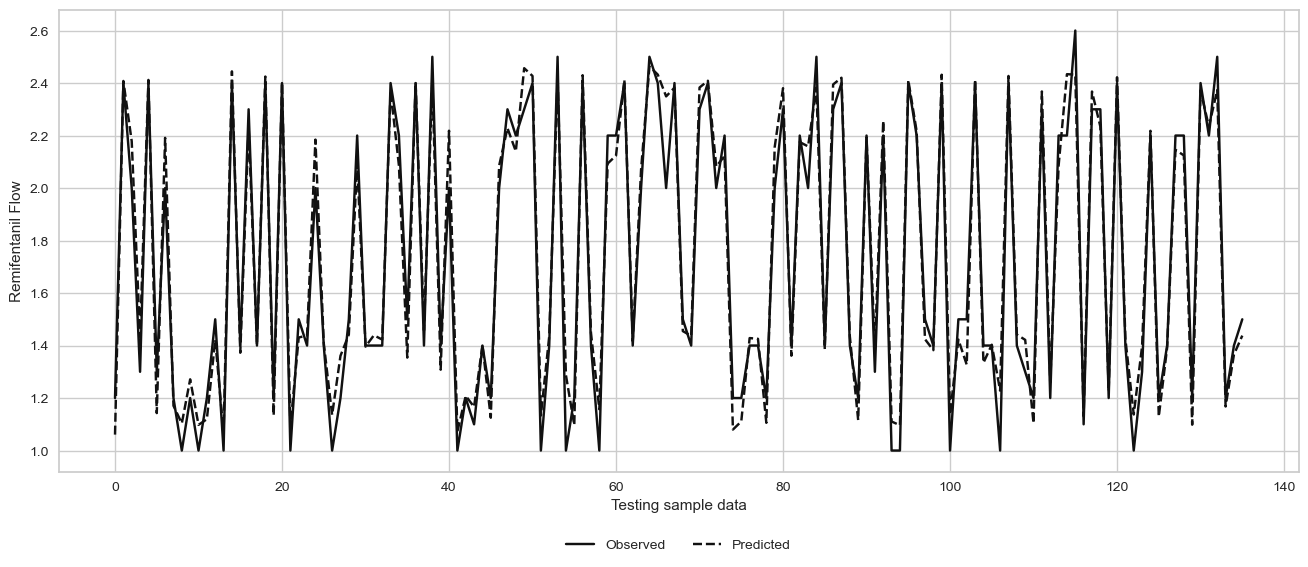

In [79]:
# Plotting observed vs predicted
plt.rcParams['figure.figsize'] = (16, 6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label='Observed', color='k', linestyle='-')
plt.plot(x_ax, y_test_pred, label='Predicted', color='k', linestyle='--')
plt.ylabel('Remifentanil Flow')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()

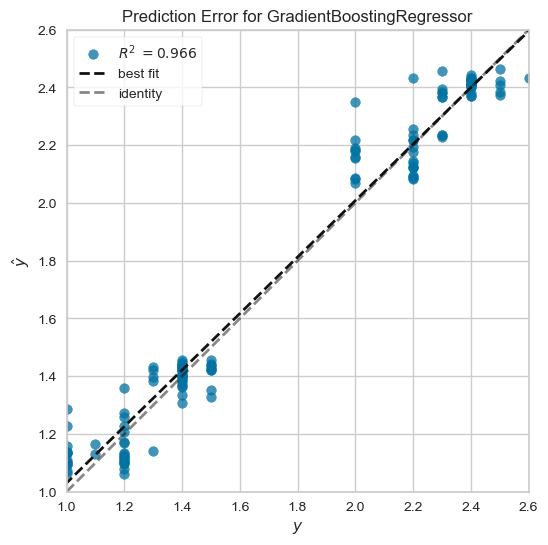

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [80]:
# Yellowbrick Prediction Error Visualizer
visualizer2 = PredictionError(model2)
visualizer2.fit(X_train, y_train)
visualizer2.score(X_test, y_test)
visualizer2.poof()

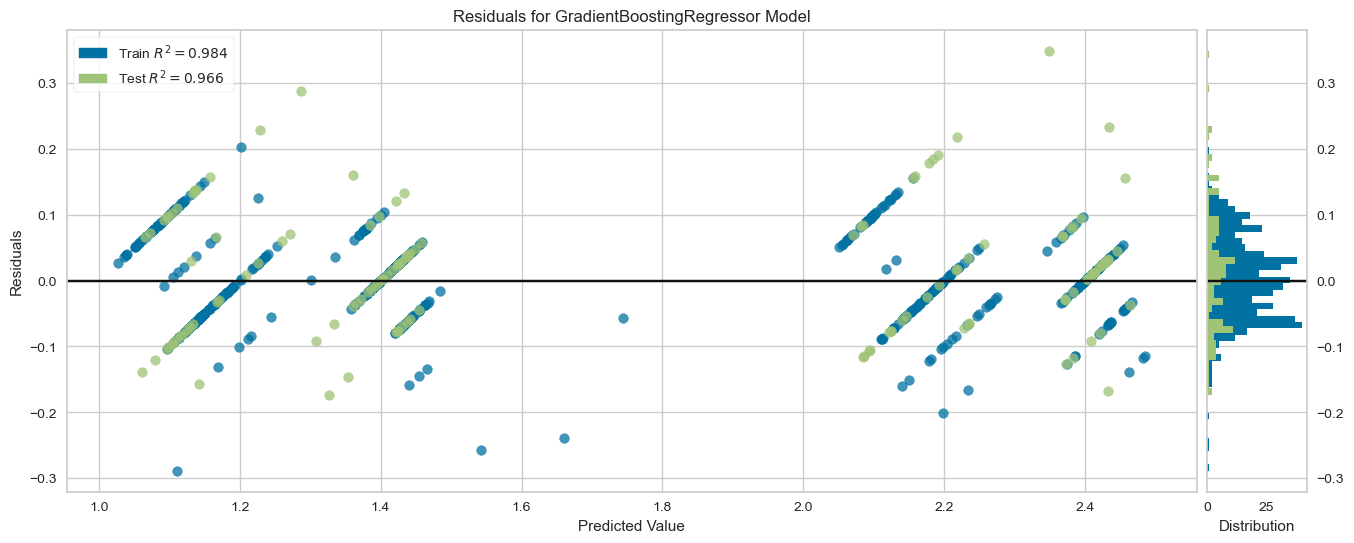

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [81]:
# Yellowbrick Residuals Plot
visualizer = ResidualsPlot(model2)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [82]:
# Making a prediction using the trained model
prediction = model2.predict([[0, 70.0, 52, 165, 110, 113, 95, 107, 3]])
print("Predicted Remifentanil Flow:", prediction)

Predicted Remifentanil Flow: [2.41517017]
